In [41]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.core import Dense, Activation, Dropout
import math
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [5]:
data=pd.read_csv('https://raw.githubusercontent.com/omerbsezer/LSTM_RNN_Tutorials_with_Demo/master/StockPricesPredictionProject/DIS.csv',header=None,index_col=None,delimiter=',')
data.head()

,0,1,2,3,4,5,6
0,1996-12-31,23.011177,23.175543,22.805719,22.928993,17.804647,2719200
1,1997-01-02,22.928993,22.970085,21.942801,22.148258,17.198397,8115400
2,1997-01-03,22.394806,22.805719,22.394806,22.764629,17.677013,4650000
3,1997-01-06,22.764629,22.928993,22.559172,22.682446,17.613201,3623300
4,1997-01-07,22.682446,22.682446,22.435898,22.641354,17.581289,3606200


In [6]:
# take close price column[5]
all_y = data[5].values
dataset=all_y.reshape(-1, 1)

In [7]:
dataset

array([[ 17.804647],
       [ 17.198397],
       [ 17.677013],
       ...,
       [102.703629],
       [102.959648],
       [102.624855]])

In [9]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [10]:
dataset

array([[0.06413303],
       [0.05843065],
       [0.0629325 ],
       ...,
       [0.86269207],
       [0.86510018],
       [0.86195112]])

In [15]:
# split into train and test sets, 50% test data, 50% training data
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [16]:
train.size,test.size

(3524, 1511)

In [17]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [18]:
# reshape into X=t and Y=t+1, timestep 240
look_back = 240
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [19]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [24]:
trainX[0].size

240

In [25]:
trainX.shape

(3283, 1, 240)

In [27]:
# create and fit the LSTM network, optimizer=adam, 25 neurons, dropout 0.1
model = Sequential()
model.add(LSTM(25, input_shape=(1, look_back)))
model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
model.fit(trainX, trainY, epochs=1000, batch_size=240, verbose=1)

Epoch 1/1000
14/14 [==============================] - 4s 5ms/step - loss: 0.0047
Epoch 2/1000
14/14 [==============================] - 0s 5ms/step - loss: 0.0017
Epoch 3/1000
14/14 [==============================] - 0s 5ms/step - loss: 9.0315e-04
Epoch 4/1000
14/14 [==============================] - 0s 4ms/step - loss: 6.7671e-04
Epoch 5/1000
14/14 [==============================] - 0s 4ms/step - loss: 5.7132e-04
Epoch 6/1000
14/14 [==============================] - 0s 5ms/step - loss: 5.3175e-04
Epoch 7/1000
14/14 [==============================] - 0s 5ms/step - loss: 4.6248e-04
Epoch 8/1000
14/14 [==============================] - 0s 5ms/step - loss: 4.3332e-04
Epoch 9/1000
14/14 [==============================] - 0s 4ms/step - loss: 3.9126e-04
Epoch 10/1000
14/14 [==============================] - 0s 5ms/step - loss: 3.8378e-04
Epoch 11/1000
14/14 [==============================] - 0s 5ms/step - loss: 3.4812e-04
Epoch 12/1000
14/14 [==============================] - 0s 5ms/step - lo

14/14 [==============================] - 0s 4ms/step - loss: 9.1970e-05
Epoch 97/1000
14/14 [==============================] - 0s 4ms/step - loss: 9.1680e-05
Epoch 98/1000
14/14 [==============================] - 0s 4ms/step - loss: 8.5950e-05
Epoch 99/1000
14/14 [==============================] - 0s 4ms/step - loss: 8.8554e-05
Epoch 100/1000
14/14 [==============================] - 0s 4ms/step - loss: 8.7471e-05
Epoch 101/1000
14/14 [==============================] - 0s 4ms/step - loss: 9.0169e-05
Epoch 102/1000
14/14 [==============================] - 0s 4ms/step - loss: 8.5283e-05
Epoch 103/1000
14/14 [==============================] - 0s 4ms/step - loss: 8.6769e-05
Epoch 104/1000
14/14 [==============================] - 0s 4ms/step - loss: 8.7175e-05
Epoch 105/1000
14/14 [==============================] - 0s 4ms/step - loss: 8.7289e-05
Epoch 106/1000
14/14 [==============================] - 0s 4ms/step - loss: 9.0424e-05
Epoch 107/1000
14/14 [==============================] - 0s 4m

14/14 [==============================] - 0s 4ms/step - loss: 5.0661e-05
Epoch 191/1000
14/14 [==============================] - 0s 4ms/step - loss: 5.1970e-05
Epoch 192/1000
14/14 [==============================] - 0s 4ms/step - loss: 5.1302e-05
Epoch 193/1000
14/14 [==============================] - 0s 4ms/step - loss: 5.2953e-05
Epoch 194/1000
14/14 [==============================] - 0s 4ms/step - loss: 5.4341e-05
Epoch 195/1000
14/14 [==============================] - 0s 4ms/step - loss: 5.3891e-05
Epoch 196/1000
14/14 [==============================] - 0s 4ms/step - loss: 5.1661e-05
Epoch 197/1000
14/14 [==============================] - 0s 4ms/step - loss: 5.5671e-05
Epoch 198/1000
14/14 [==============================] - 0s 4ms/step - loss: 5.0453e-05
Epoch 199/1000
14/14 [==============================] - 0s 3ms/step - loss: 5.2194e-05
Epoch 200/1000
14/14 [==============================] - 0s 4ms/step - loss: 5.1141e-05
Epoch 201/1000
14/14 [==============================] - 0s

14/14 [==============================] - 0s 4ms/step - loss: 5.2356e-05
Epoch 285/1000
14/14 [==============================] - 0s 4ms/step - loss: 5.0134e-05
Epoch 286/1000
14/14 [==============================] - 0s 4ms/step - loss: 4.5311e-05
Epoch 287/1000
14/14 [==============================] - 0s 3ms/step - loss: 4.5509e-05
Epoch 288/1000
14/14 [==============================] - 0s 4ms/step - loss: 4.7228e-05
Epoch 289/1000
14/14 [==============================] - 0s 4ms/step - loss: 4.6217e-05
Epoch 290/1000
14/14 [==============================] - 0s 4ms/step - loss: 4.1812e-05
Epoch 291/1000
14/14 [==============================] - 0s 4ms/step - loss: 4.1027e-05
Epoch 292/1000
14/14 [==============================] - 0s 4ms/step - loss: 4.1227e-05
Epoch 293/1000
14/14 [==============================] - 0s 4ms/step - loss: 4.2328e-05
Epoch 294/1000
14/14 [==============================] - 0s 4ms/step - loss: 4.3755e-05
Epoch 295/1000
14/14 [==============================] - 0s

14/14 [==============================] - 0s 4ms/step - loss: 4.1023e-05
Epoch 379/1000
14/14 [==============================] - 0s 4ms/step - loss: 4.2080e-05
Epoch 380/1000
14/14 [==============================] - 0s 4ms/step - loss: 4.4032e-05
Epoch 381/1000
14/14 [==============================] - 0s 4ms/step - loss: 4.4314e-05
Epoch 382/1000
14/14 [==============================] - 0s 4ms/step - loss: 4.0261e-05
Epoch 383/1000
14/14 [==============================] - 0s 4ms/step - loss: 3.9621e-05
Epoch 384/1000
14/14 [==============================] - 0s 4ms/step - loss: 3.8531e-05
Epoch 385/1000
14/14 [==============================] - 0s 4ms/step - loss: 4.0340e-05
Epoch 386/1000
14/14 [==============================] - 0s 4ms/step - loss: 4.1129e-05
Epoch 387/1000
14/14 [==============================] - 0s 4ms/step - loss: 4.5156e-05
Epoch 388/1000
14/14 [==============================] - 0s 4ms/step - loss: 4.9636e-05
Epoch 389/1000
14/14 [==============================] - 0s

14/14 [==============================] - 0s 4ms/step - loss: 3.9076e-05
Epoch 473/1000
14/14 [==============================] - 0s 4ms/step - loss: 3.9472e-05
Epoch 474/1000
14/14 [==============================] - 0s 4ms/step - loss: 4.2021e-05
Epoch 475/1000
14/14 [==============================] - 0s 4ms/step - loss: 3.8721e-05
Epoch 476/1000
14/14 [==============================] - 0s 4ms/step - loss: 3.8149e-05
Epoch 477/1000
14/14 [==============================] - 0s 4ms/step - loss: 4.1490e-05
Epoch 478/1000
14/14 [==============================] - 0s 4ms/step - loss: 4.7167e-05
Epoch 479/1000
14/14 [==============================] - 0s 3ms/step - loss: 4.0883e-05
Epoch 480/1000
14/14 [==============================] - 0s 4ms/step - loss: 4.0712e-05
Epoch 481/1000
14/14 [==============================] - 0s 4ms/step - loss: 3.9004e-05
Epoch 482/1000
14/14 [==============================] - 0s 3ms/step - loss: 4.1690e-05
Epoch 483/1000
14/14 [==============================] - 0s

14/14 [==============================] - 0s 4ms/step - loss: 4.5694e-05
Epoch 567/1000
14/14 [==============================] - 0s 4ms/step - loss: 4.5423e-05
Epoch 568/1000
14/14 [==============================] - 0s 4ms/step - loss: 3.7921e-05
Epoch 569/1000
14/14 [==============================] - 0s 3ms/step - loss: 3.7341e-05
Epoch 570/1000
14/14 [==============================] - 0s 4ms/step - loss: 3.5690e-05
Epoch 571/1000
14/14 [==============================] - 0s 4ms/step - loss: 3.8237e-05
Epoch 572/1000
14/14 [==============================] - 0s 4ms/step - loss: 4.0748e-05
Epoch 573/1000
14/14 [==============================] - 0s 6ms/step - loss: 4.2914e-05
Epoch 574/1000
14/14 [==============================] - 0s 4ms/step - loss: 4.0883e-05
Epoch 575/1000
14/14 [==============================] - 0s 4ms/step - loss: 3.8700e-05
Epoch 576/1000
14/14 [==============================] - 0s 4ms/step - loss: 4.1905e-05
Epoch 577/1000
14/14 [==============================] - 0s

14/14 [==============================] - 0s 4ms/step - loss: 3.8086e-05
Epoch 661/1000
14/14 [==============================] - 0s 4ms/step - loss: 3.7351e-05
Epoch 662/1000
14/14 [==============================] - 0s 4ms/step - loss: 3.5182e-05
Epoch 663/1000
14/14 [==============================] - 0s 4ms/step - loss: 3.9078e-05
Epoch 664/1000
14/14 [==============================] - 0s 4ms/step - loss: 4.1708e-05
Epoch 665/1000
14/14 [==============================] - 0s 4ms/step - loss: 3.7929e-05
Epoch 666/1000
14/14 [==============================] - 0s 4ms/step - loss: 3.7140e-05
Epoch 667/1000
14/14 [==============================] - 0s 4ms/step - loss: 3.9502e-05
Epoch 668/1000
14/14 [==============================] - 0s 4ms/step - loss: 3.9371e-05
Epoch 669/1000
14/14 [==============================] - 0s 4ms/step - loss: 3.6426e-05
Epoch 670/1000
14/14 [==============================] - 0s 5ms/step - loss: 3.7027e-05
Epoch 671/1000
14/14 [==============================] - 0s

14/14 [==============================] - 0s 4ms/step - loss: 3.6164e-05
Epoch 755/1000
14/14 [==============================] - 0s 4ms/step - loss: 3.7271e-05
Epoch 756/1000
14/14 [==============================] - 0s 4ms/step - loss: 3.7626e-05
Epoch 757/1000
14/14 [==============================] - 0s 4ms/step - loss: 3.5723e-05
Epoch 758/1000
14/14 [==============================] - 0s 4ms/step - loss: 3.5979e-05
Epoch 759/1000
14/14 [==============================] - 0s 4ms/step - loss: 3.4960e-05
Epoch 760/1000
14/14 [==============================] - 0s 4ms/step - loss: 3.9765e-05
Epoch 761/1000
14/14 [==============================] - 0s 4ms/step - loss: 4.0281e-05
Epoch 762/1000
14/14 [==============================] - 0s 4ms/step - loss: 3.6315e-05
Epoch 763/1000
14/14 [==============================] - 0s 4ms/step - loss: 4.3979e-05
Epoch 764/1000
14/14 [==============================] - 0s 4ms/step - loss: 4.1934e-05
Epoch 765/1000
14/14 [==============================] - 0s

14/14 [==============================] - 0s 4ms/step - loss: 3.7301e-05
Epoch 849/1000
14/14 [==============================] - 0s 4ms/step - loss: 3.5503e-05
Epoch 850/1000
14/14 [==============================] - 0s 4ms/step - loss: 3.5792e-05
Epoch 851/1000
14/14 [==============================] - 0s 4ms/step - loss: 3.6973e-05
Epoch 852/1000
14/14 [==============================] - 0s 4ms/step - loss: 3.7813e-05
Epoch 853/1000
14/14 [==============================] - 0s 4ms/step - loss: 3.6812e-05
Epoch 854/1000
14/14 [==============================] - 0s 4ms/step - loss: 3.5507e-05
Epoch 855/1000
14/14 [==============================] - 0s 3ms/step - loss: 3.4708e-05
Epoch 856/1000
14/14 [==============================] - 0s 4ms/step - loss: 3.6629e-05
Epoch 857/1000
14/14 [==============================] - 0s 4ms/step - loss: 3.5062e-05
Epoch 858/1000
14/14 [==============================] - 0s 4ms/step - loss: 3.5334e-05
Epoch 859/1000
14/14 [==============================] - 0s

14/14 [==============================] - 0s 4ms/step - loss: 3.6325e-05
Epoch 943/1000
14/14 [==============================] - 0s 4ms/step - loss: 3.5812e-05
Epoch 944/1000
14/14 [==============================] - 0s 4ms/step - loss: 3.5069e-05
Epoch 945/1000
14/14 [==============================] - 0s 4ms/step - loss: 3.6250e-05
Epoch 946/1000
14/14 [==============================] - 0s 3ms/step - loss: 3.6587e-05
Epoch 947/1000
14/14 [==============================] - 0s 4ms/step - loss: 3.6055e-05
Epoch 948/1000
14/14 [==============================] - 0s 4ms/step - loss: 3.8031e-05
Epoch 949/1000
14/14 [==============================] - 0s 3ms/step - loss: 3.6150e-05
Epoch 950/1000
14/14 [==============================] - 0s 4ms/step - loss: 3.5927e-05
Epoch 951/1000
14/14 [==============================] - 0s 4ms/step - loss: 3.5626e-05
Epoch 952/1000
14/14 [==============================] - 0s 4ms/step - loss: 3.4786e-05
Epoch 953/1000
14/14 [==============================] - 0s

In [28]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

40/40 [==============================] - 0s 4ms/step


In [29]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [39]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.53 RMSE
Test Score: 7.79 RMSE


testPrices:
testPredictions:
[[32.178074]
 [31.999935]
 [31.720463]
 ...
 [89.86146 ]
 [89.9352  ]
 [89.19249 ]]


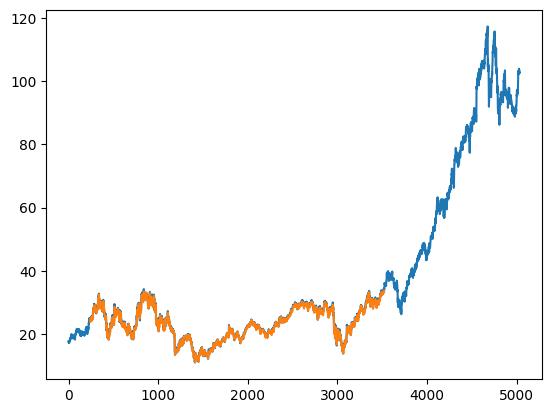

In [47]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
print('testPrices:')
testPrices=scaler.inverse_transform(dataset[test_size+look_back:])


print('testPredictions:')
print(testPredict)

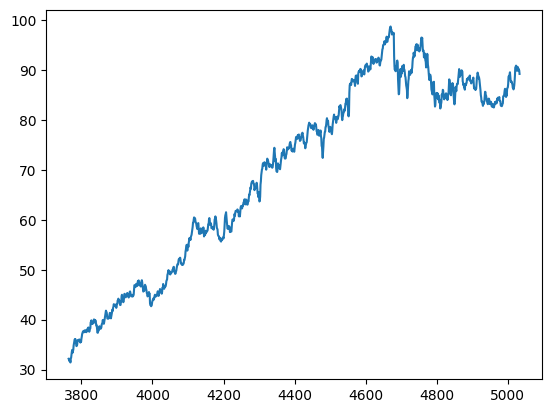

In [48]:
# plot the actual price, prediction in test data=red line, actual price=blue line
plt.plot(testPredictPlot)
plt.show()